In [534]:
#from google.colab import drive
#drive.mount('/content/drive')
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras import backend as K
from keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import PIL
import os
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings('ignore')
plt.rcParams["axes.grid"] = False
np.random.seed(101)

In [535]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [536]:
filelist_trainx_ph2 = sorted(glob.glob('trainx/*.bmp'), key=numericalSort)
X_train_ph2 = np.array([np.array(Image.open(fname)) for fname in filelist_trainx_ph2])

filelist_trainy_ph2 = sorted(glob.glob('trainy/*.bmp'), key=numericalSort)
Y_train_ph2 = np.array([np.array(Image.open(fname)) for fname in filelist_trainy_ph2])

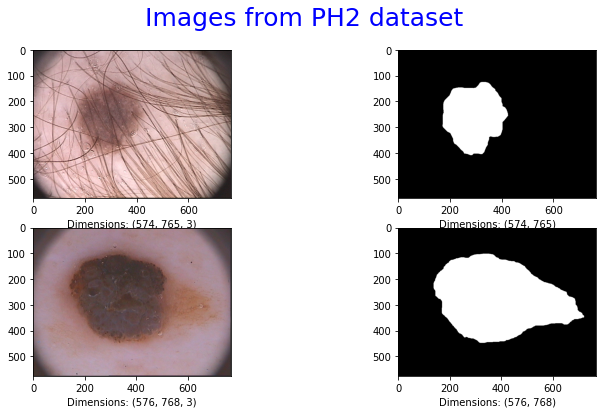

In [537]:
plt.figure(figsize=(12,6))

plt.suptitle('Images from PH2 dataset', fontsize = 25, color='blue')
 
plt.subplot(2,2,1)
plt.imshow(X_train_ph2[1])
plt.xlabel("Dimensions: "+str(np.array(X_train_ph2[1]).shape))
plt.subplot(2,2,2)
plt.imshow(Y_train_ph2[1], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(Y_train_ph2[1]).shape))

plt.subplot(2,2,3)
plt.imshow(X_train_ph2[112])
plt.xlabel("Dimensions: "+str(np.array(X_train_ph2[185]).shape))
plt.subplot(2,2,4)
plt.imshow(Y_train_ph2[112], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(Y_train_ph2[185]).shape))
plt.show()

In [538]:
def resize(filename, size = (256,192)):
    im = Image.open(filename)
    im_resized = im.resize(size, Image.ANTIALIAS)
    return (im_resized)

In [539]:
X_train_ph2_resized = []
Y_train_ph2_resized = []

for i in range(len(filelist_trainx_ph2)):
    X_train_ph2_resized.append(resize(filelist_trainx_ph2[i]))
    Y_train_ph2_resized.append(resize(filelist_trainy_ph2[i]))    
    

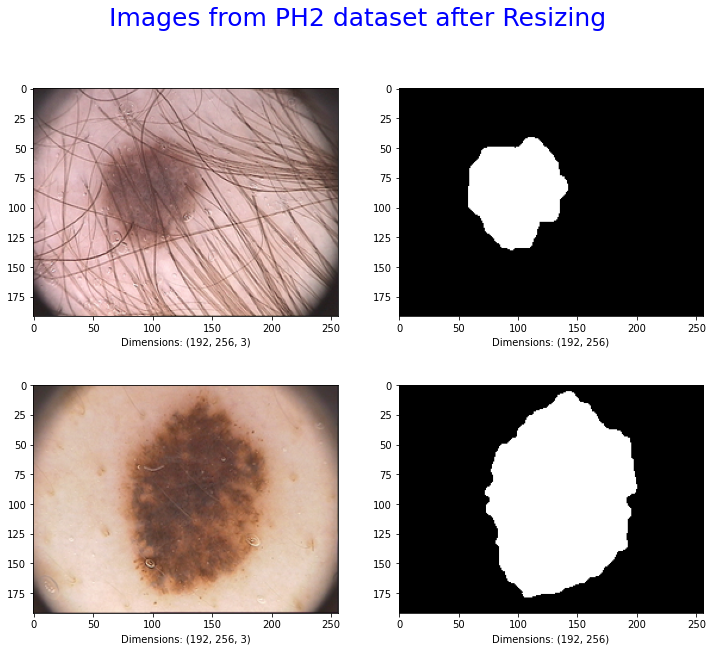

In [540]:
plt.figure(figsize=(12,10))

plt.suptitle('Images from PH2 dataset after Resizing', fontsize = 25, color='blue')

plt.subplot(2,2,1)
plt.imshow(X_train_ph2_resized[1])
plt.xlabel("Dimensions: "+str(np.array(X_train_ph2_resized[1]).shape))
plt.subplot(2,2,2)
plt.imshow(Y_train_ph2_resized[1], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(Y_train_ph2_resized[1]).shape))

plt.subplot(2,2,3)
plt.imshow(X_train_ph2_resized[117])
plt.xlabel("Dimensions: "+str(np.array(X_train_ph2_resized[185]).shape))
plt.subplot(2,2,4)
plt.imshow(Y_train_ph2_resized[117], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(Y_train_ph2_resized[185]).shape))
plt.show()

In [541]:
X_train_ph2 = np.array([np.array(img) for img in X_train_ph2_resized])
Y_train_ph2 = np.array([np.array(img) for img in Y_train_ph2_resized])

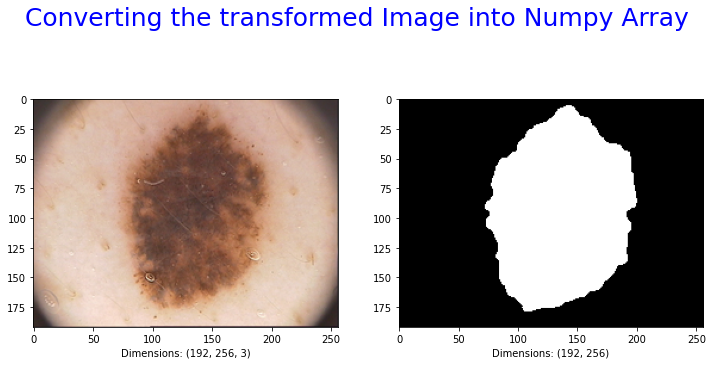

In [542]:
plt.figure(figsize=(12,6))

plt.suptitle('Converting the transformed Image into Numpy Array', fontsize = 25, color='blue')

plt.subplot(1,2,1)
plt.imshow(X_train_ph2[117])
plt.xlabel("Dimensions: "+str(np.array(X_train_ph2_resized[180]).shape))
plt.subplot(1,2,2)
plt.imshow(Y_train_ph2[117], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(Y_train_ph2_resized[180]).shape))

plt.show()

In [543]:
x_train, x_test, y_train, y_test = train_test_split(X_train_ph2, Y_train_ph2, test_size = 0.25, random_state = 101)

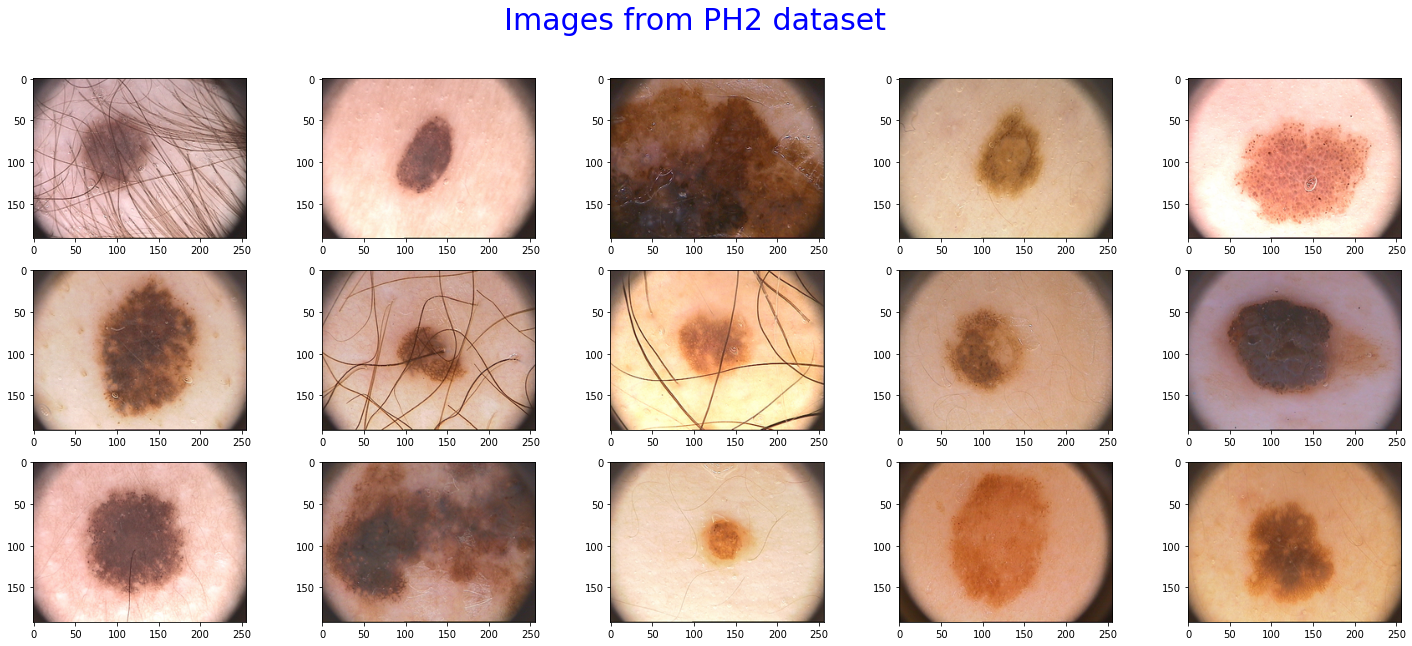

In [544]:
plt.figure(figsize=(25,10))

plt.suptitle('Images from PH2 dataset', fontsize = 30, color='blue')

plt.subplot(3,5,1)
plt.imshow(X_train_ph2[1])
plt.subplot(3,5,2)
plt.imshow(X_train_ph2[12])
plt.subplot(3,5,3)
plt.imshow(X_train_ph2[44])
plt.subplot(3,5,4)
plt.imshow(X_train_ph2[67])
plt.subplot(3,5,5)
plt.imshow(X_train_ph2[100])
plt.subplot(3,5,6)
plt.imshow(X_train_ph2[117])
plt.subplot(3,5,7)
plt.imshow(X_train_ph2[128])
plt.subplot(3,5,8)
plt.imshow(X_train_ph2[147])
plt.subplot(3,5,9)
plt.imshow(X_train_ph2[132])
plt.subplot(3,5,10)
plt.imshow(X_train_ph2[112])
plt.subplot(3,5,11)
plt.imshow(X_train_ph2[31])
plt.subplot(3,5,12)
plt.imshow(X_train_ph2[52])
plt.subplot(3,5,13)
plt.imshow(X_train_ph2[74])
plt.subplot(3,5,14)
plt.imshow(X_train_ph2[86])
plt.subplot(3,5,15)
plt.imshow(X_train_ph2[150])
plt.show()

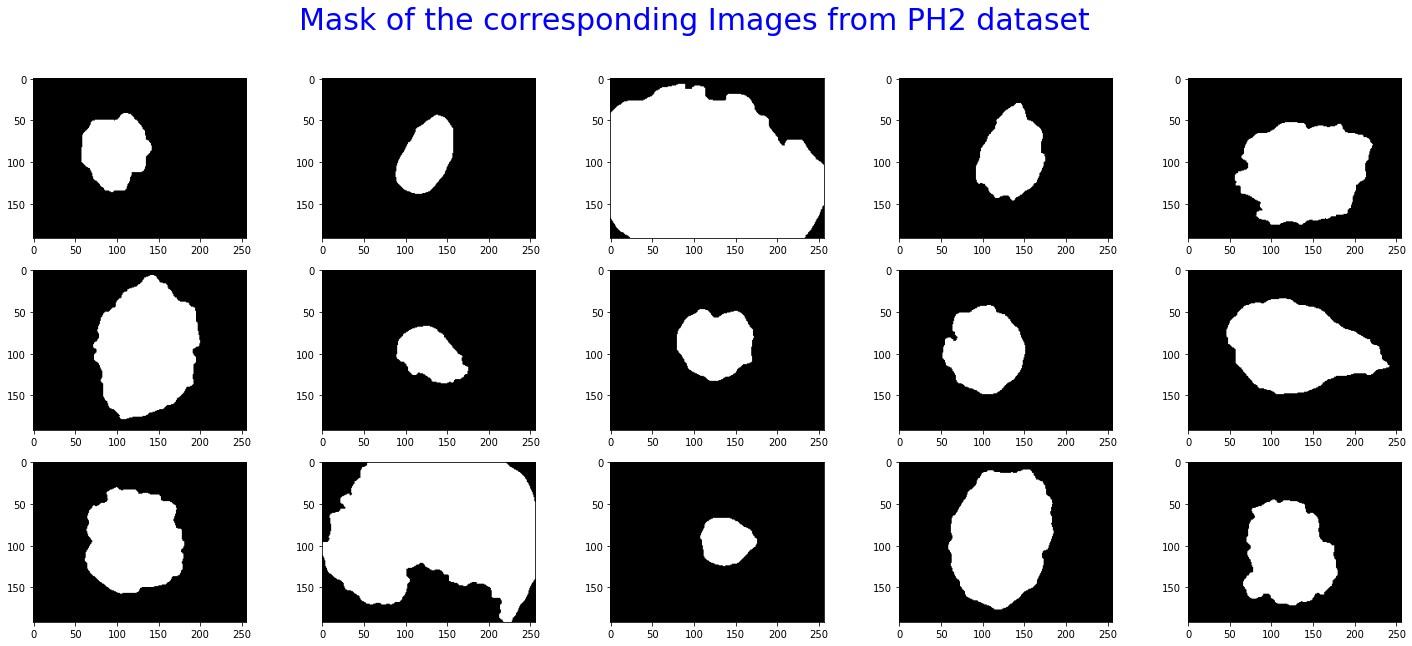

In [545]:
plt.figure(figsize=(25,10))

plt.suptitle('Mask of the corresponding Images from PH2 dataset', fontsize = 30, color='blue')

plt.subplot(3,5,1)
plt.imshow(Y_train_ph2[1], cmap = plt.cm.binary_r)
plt.subplot(3,5,2)
plt.imshow(Y_train_ph2[12], cmap = plt.cm.binary_r)
plt.subplot(3,5,3)
plt.imshow(Y_train_ph2[44], cmap = plt.cm.binary_r)
plt.subplot(3,5,4)
plt.imshow(Y_train_ph2[67], cmap = plt.cm.binary_r)
plt.subplot(3,5,5)
plt.imshow(Y_train_ph2[100], cmap = plt.cm.binary_r)
plt.subplot(3,5,6)
plt.imshow(Y_train_ph2[117], cmap = plt.cm.binary_r)
plt.subplot(3,5,7)
plt.imshow(Y_train_ph2[128], cmap = plt.cm.binary_r)
plt.subplot(3,5,8)
plt.imshow(Y_train_ph2[147], cmap = plt.cm.binary_r)
plt.subplot(3,5,9)
plt.imshow(Y_train_ph2[132], cmap = plt.cm.binary_r)
plt.subplot(3,5,10)
plt.imshow(Y_train_ph2[112], cmap = plt.cm.binary_r)
plt.subplot(3,5,11)
plt.imshow(Y_train_ph2[31], cmap = plt.cm.binary_r)
plt.subplot(3,5,12)
plt.imshow(Y_train_ph2[52], cmap = plt.cm.binary_r)
plt.subplot(3,5,13)
plt.imshow(Y_train_ph2[74], cmap = plt.cm.binary_r)
plt.subplot(3,5,14)
plt.imshow(Y_train_ph2[86], cmap = plt.cm.binary_r)
plt.subplot(3,5,15)
plt.imshow(Y_train_ph2[150], cmap = plt.cm.binary_r)

plt.show()

In [546]:
def horizontal_flip(x_image, y_image):
    x_image = cv2.flip(x_image, 1)
    y_image = cv2.flip(y_image.astype('float32'), 1)
    return x_image, y_image.astype('int')

def vertical_flip(x_image, y_image):
    x_image = cv2.flip(x_image, 0)
    y_image = cv2.flip(y_image.astype('float32'), 0)
    return x_image, y_image.astype('int')

def both_flip(x_image, y_image):
    x_image = cv2.flip(x_image, -1)
    y_image = cv2.flip(y_image.astype('float32'), -1)
    return x_image, y_image.astype('int')

def random_rotation(x_image, y_image):
    rows_x,cols_x, chl_x = x_image.shape
    rows_y,cols_y = y_image.shape
    rand_num = np.random.randint(-60,60)
    M1 = cv2.getRotationMatrix2D((cols_x/2,rows_x/2),rand_num,1)
    M2 = cv2.getRotationMatrix2D((cols_y/2,rows_y/2),rand_num,1)
    x_image = cv2.warpAffine(x_image,M1,(cols_x,rows_x))
    y_image = cv2.warpAffine(y_image.astype('float32'),M2,(cols_y,rows_y))
    return np.array(x_image), np.array(y_image.astype('int'))

In [547]:
def img_augmentation(x_train, y_train):
    x_flip = []
    y_flip = []
    x_vert = []
    y_vert = []
    x_both = []
    y_both = []
    x_rotat = []
    y_rotat = []
    
    for idx in range(len(x_train)):
        
        x,y = horizontal_flip(x_train[idx], y_train[idx])
        x_flip.append(x)
        y_flip.append(y)
        
        x,y = vertical_flip(x_train[idx], y_train[idx])
        x_vert.append(x)
        y_vert.append(y)
        
        x,y = both_flip(x_train[idx], y_train[idx])
        x_both.append(x)
        y_both.append(y)
        
        x,y = random_rotation(x_train[idx], y_train[idx])
        x_rotat.append(x)
        y_rotat.append(y)
        

        
    return  np.array(x_flip), np.array(y_flip), np.array(x_vert), np.array(y_vert), np.array(x_both), np.array(y_both), np.array(x_rotat), np.array(y_rotat)

In [548]:
x_flipped, y_flipped, x_vertical, y_vertical, x_bothed, y_bothed, x_rotated, y_rotated = img_augmentation(x_train, y_train)
x_flipped_t, y_flipped_t, x_vertical_t, y_vertical_t, x_bothed_t, y_bothed_t,  x_rotated_t, y_rotated_t  = img_augmentation(x_test, y_test)

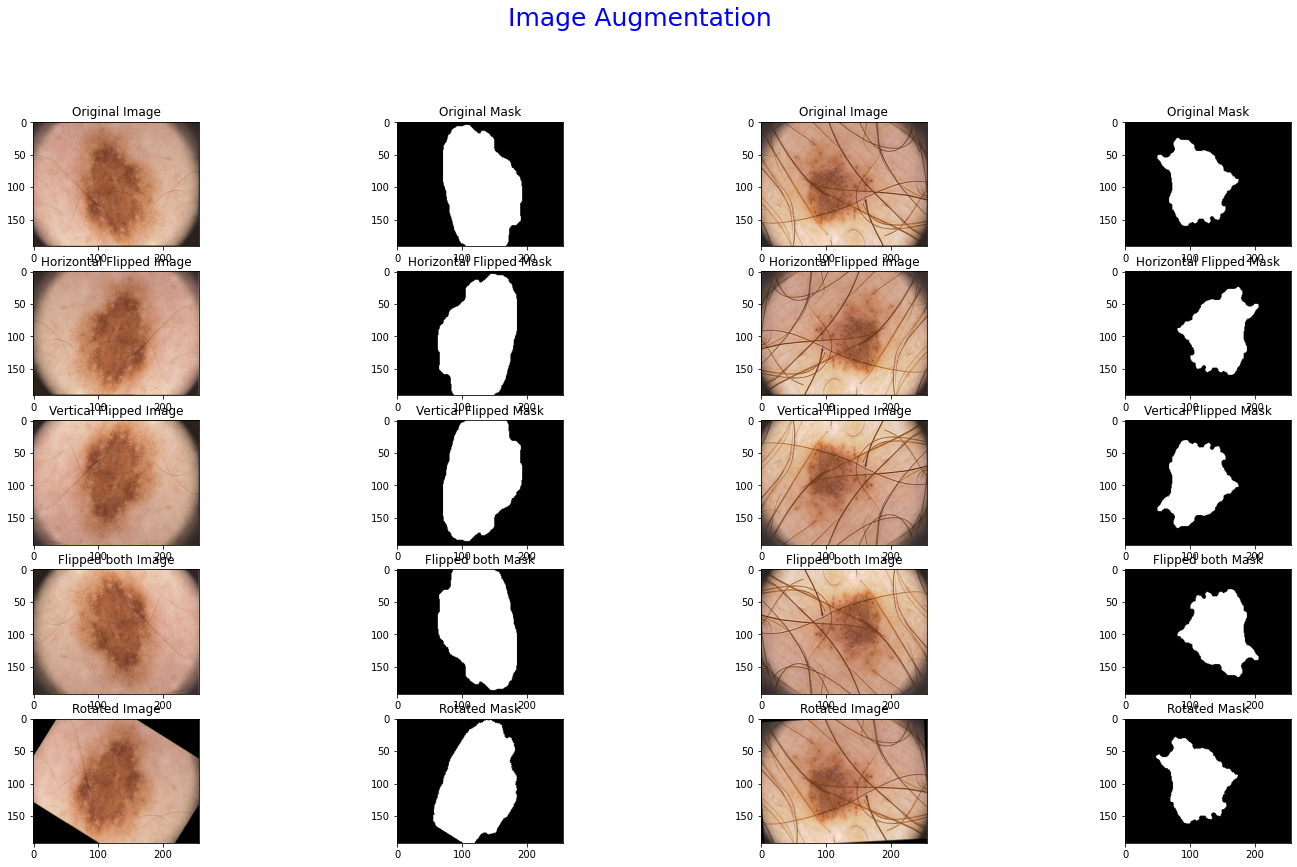

In [549]:
plt.figure(figsize=(25,16))

plt.suptitle('Image Augmentation', fontsize = 25, color='blue')

plt.subplot(6,4,1)
plt.imshow(x_train[112])
plt.title('Original Image')
plt.subplot(6,4,2)
plt.imshow(y_train[112], plt.cm.binary_r)
plt.title('Original Mask')
plt.subplot(6,4,3)
plt.imshow(x_train[12])
plt.title('Original Image')
plt.subplot(6,4,4)
plt.imshow(y_train[12], plt.cm.binary_r)
plt.title('Original Mask')

plt.subplot(6,4,5)
plt.imshow(x_flipped[112])
plt.title('Horizontal Flipped Image')
plt.subplot(6,4,6)
plt.imshow(y_flipped[112], plt.cm.binary_r)
plt.title('Horizontal Flipped Mask')
plt.subplot(6,4,7)
plt.imshow(x_flipped[12])
plt.title('Horizontal Flipped Image')
plt.subplot(6,4,8)
plt.imshow(y_flipped[12], plt.cm.binary_r)
plt.title('Horizontal Flipped Mask')

plt.subplot(6,4,9)
plt.imshow(x_vertical[112])
plt.title('Vertical Flipped Image')
plt.subplot(6,4,10)
plt.imshow(y_vertical[112], plt.cm.binary_r)
plt.title('Vertical Flipped Mask')
plt.subplot(6,4,11)
plt.imshow(x_vertical[12])
plt.title('Vertical Flipped Image')
plt.subplot(6,4,12)
plt.imshow(y_vertical[12], plt.cm.binary_r)
plt.title('Vertical Flipped Mask')

plt.subplot(6,4,13)
plt.imshow(x_bothed[112])
plt.title('Flipped both Image')
plt.subplot(6,4,14)
plt.imshow(y_bothed[112], plt.cm.binary_r)
plt.title('Flipped both Mask')
plt.subplot(6,4,15)
plt.imshow(x_bothed[12])
plt.title('Flipped both Image')
plt.subplot(6,4,16)
plt.imshow(y_bothed[12], plt.cm.binary_r)
plt.title('Flipped both Mask')

plt.subplot(6,4,17)
plt.imshow(x_rotated[112])
plt.title('Rotated Image')
plt.subplot(6,4,18)
plt.imshow(y_rotated[112], plt.cm.binary_r)
plt.title('Rotated Mask')
plt.subplot(6,4,19)
plt.imshow(x_rotated[12])
plt.title('Rotated Image')
plt.subplot(6,4,20)
plt.imshow(y_rotated[12], plt.cm.binary_r)
plt.title('Rotated Mask')


plt.show()

In [550]:
x_train_full = np.concatenate([x_train, x_rotated, x_flipped, x_bothed, x_vertical])
y_train_full = np.concatenate([y_train, y_rotated, y_flipped, y_bothed, y_vertical])

In [551]:
def iou(y_true, y_pred, smooth = 100):
    
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    union = sum_ - intersection
    jac = (intersection + smooth) / (union + smooth)
    return jac

In [552]:
def dice_coef(y_true, y_pred, smooth = 100):
    
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [553]:
def precision(y_true, y_pred):
   
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [554]:
def recall(y_true, y_pred):
   
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [555]:
def accuracy(y_true, y_pred):
    
    return K.mean(K.equal(y_true, K.round(y_pred)))

In [556]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.20, random_state = 101)

In [557]:
print("Length of the Training Set   : {}".format(len(x_train)))
print("Length of the Test Set       : {}".format(len(x_test)))
print("Length of the Validation Set : {}".format(len(x_val)))

Length of the Training Set   : 600
Length of the Test Set       : 50
Length of the Validation Set : 150


In [558]:
def segnet(epochs_num,savename):

    # Encoding layer
    
    img_input = Input(shape= (192, 256, 3))
    x = Conv2D(64, (3, 3), padding='same', name='conv1',strides= (1,1))(img_input)
    x = BatchNormalization(name='bn1')(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same', name='conv2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(128, (3, 3), padding='same', name='conv3')(x)
    x = BatchNormalization(name='bn3')(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same', name='conv4')(x)
    x = BatchNormalization(name='bn4')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    #x = Conv2D(256, (3, 3), padding='same', name='conv5')(x)
    #x = BatchNormalization(name='bn5')(x)
    #x = Activation('relu')(x)
    #x = Conv2D(256, (3, 3), padding='same', name='conv6')(x)
    #x = BatchNormalization(name='bn6')(x)
    #x = Activation('relu')(x)
    #x = Conv2D(256, (3, 3), padding='same', name='conv7')(x)
    #x = BatchNormalization(name='bn7')(x)
    #x = Activation('relu')(x)
    #x = MaxPooling2D()(x)

    #x = Conv2D(256, (3, 3), padding='same', name='conv8')(x)
    #x = BatchNormalization(name='bn8')(x)
    #x = Activation('relu')(x)
    #x = Conv2D(256, (3, 3), padding='same', name='conv9')(x)
    #x = BatchNormalization(name='bn9')(x)
    #x = Activation('relu')(x)
    #x = Conv2D(256, (3, 3), padding='same', name='conv10')(x)
    #x = BatchNormalization(name='bn10')(x)
    #x = Activation('relu')(x)
    #x = MaxPooling2D()(x)
    
    #x = Conv2D(512, (3, 3), padding='same', name='conv11')(x)
    #x = BatchNormalization(name='bn11')(x)
    #x = Activation('relu')(x)
    #x = Conv2D(512, (3, 3), padding='same', name='conv12')(x)
    #x = BatchNormalization(name='bn12')(x)
    #x = Activation('relu')(x)
    #x = Conv2D(512, (3, 3), padding='same', name='conv13')(x)
    #x = BatchNormalization(name='bn13')(x)
    #x = Activation('relu')(x)
    #x = MaxPooling2D()(x)

    x = Dense(256, activation = 'relu', name='fc1')(x)
    x = Dense(256, activation = 'relu', name='fc2')(x)
    
    # Decoding Layer 
    
    #x = UpSampling2D()(x)
    #x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv1')(x)
    #x = BatchNormalization(name='bn14')(x)
    #x = Activation('relu')(x)
    #x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv2')(x)
    #x = BatchNormalization(name='bn15')(x)
    #x = Activation('relu')(x)
    #x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv3')(x)
    #x = BatchNormalization(name='bn16')(x)
    #x = Activation('relu')(x)
    
    #x = UpSampling2D()(x)
    #x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv4')(x)
    #x = BatchNormalization(name='bn17')(x)
    #x = Activation('relu')(x)
    #x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv5')(x)
    #x = BatchNormalization(name='bn18')(x)
    #x = Activation('relu')(x)
    #x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv6')(x)
    #x = BatchNormalization(name='bn19')(x)
    #x = Activation('relu')(x)

    #x = UpSampling2D()(x)
    #x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv7')(x)
    #x = BatchNormalization(name='bn20')(x)
    #x = Activation('relu')(x)
    #x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv8')(x)
    #x = BatchNormalization(name='bn21')(x)
    #x = Activation('relu')(x)
    #x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv9')(x)
    #x = BatchNormalization(name='bn22')(x)
    #x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv10')(x)
    x = BatchNormalization(name='bn23')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv11')(x)
    x = BatchNormalization(name='bn24')(x)
    x = Activation('relu')(x)
    
    x = UpSampling2D()(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv12')(x)
    x = BatchNormalization(name='bn25')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(1, (3, 3), padding='same', name='deconv13')(x)
    x = BatchNormalization(name='bn26')(x)
    x = Activation('sigmoid')(x)
    pred = Reshape((192,256))(x)
    
    
    model = Model(inputs=img_input, outputs=pred)
     
    model.compile(optimizer= Adam(lr = 0.003), loss= ['binary_crossentropy']
                  , metrics=[iou, dice_coef, precision, recall, accuracy])
    
    model.summary()
    hist = model.fit(x_train, y_train, epochs= epochs_num, batch_size= 32, validation_data= (x_val, y_val), verbose=1)
    
    model.save(savename)
    return model,hist

In [559]:
img_input = Input(shape= (192, 256, 3))
x = Conv2D(64, (3, 3), padding='same', name='conv1',strides= (1,1))(img_input)
x = BatchNormalization(name='bn1')(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), padding='same', name='conv2')(x)
x = BatchNormalization(name='bn2')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(128, (3, 3), padding='same', name='conv3')(x)
x = BatchNormalization(name='bn3')(x)
x = Activation('relu')(x)
x = Conv2D(128, (3, 3), padding='same', name='conv4')(x)
x = BatchNormalization(name='bn4')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

#x = Conv2D(256, (3, 3), padding='same', name='conv5')(x)
#x = BatchNormalization(name='bn5')(x)
#x = Activation('relu')(x)
#x = Conv2D(256, (3, 3), padding='same', name='conv6')(x)
#x = BatchNormalization(name='bn6')(x)
#x = Activation('relu')(x)
#x = Conv2D(256, (3, 3), padding='same', name='conv7')(x)
#x = BatchNormalization(name='bn7')(x)
#x = Activation('relu')(x)
#x = MaxPooling2D()(x)

#x = Conv2D(256, (3, 3), padding='same', name='conv8')(x)
#x = BatchNormalization(name='bn8')(x)
#x = Activation('relu')(x)
#x = Conv2D(256, (3, 3), padding='same', name='conv9')(x)
#x = BatchNormalization(name='bn9')(x)
#x = Activation('relu')(x)
#x = Conv2D(256, (3, 3), padding='same', name='conv10')(x)
#x = BatchNormalization(name='bn10')(x)
#x = Activation('relu')(x)
# = MaxPooling2D()(x)

#x = Conv2D(512, (3, 3), padding='same', name='conv11')(x)
#x = BatchNormalization(name='bn11')(x)
#x = Activation('relu')(x)
#x = Conv2D(512, (3, 3), padding='same', name='conv12')(x)
#x = BatchNormalization(name='bn12')(x)
#x = Activation('relu')(x)
#x = Conv2D(512, (3, 3), padding='same', name='conv13')(x)
#x = BatchNormalization(name='bn13')(x)
#x = Activation('relu')(x)
#x = MaxPooling2D()(x)

x = Dense(256, activation = 'relu', name='fc1')(x)
x = Dense(256, activation = 'relu', name='fc2')(x)

# Decoding Layer 

#x = UpSampling2D()(x)
#x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv1')(x)
#x = BatchNormalization(name='bn14')(x)
#x = Activation('relu')(x)
#x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv2')(x)
#x = BatchNormalization(name='bn15')(x)
#x = Activation('relu')(x)
#x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv3')(x)
#x = BatchNormalization(name='bn16')(x)
#x = Activation('relu')(x)

#x = UpSampling2D()(x)
#x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv4')(x)
#x = BatchNormalization(name='bn17')(x)
#x = Activation('relu')(x)
#x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv5')(x)
# = BatchNormalization(name='bn18')(x)
#x = Activation('relu')(x)
#x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv6')(x)
#x = BatchNormalization(name='bn19')(x)
#x = Activation('relu')(x)

#x = UpSampling2D()(x)
#x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv7')(x)
#x = BatchNormalization(name='bn20')(x)
#x = Activation('relu')(x)
#x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv8')(x)
#x = BatchNormalization(name='bn21')(x)
#x = Activation('relu')(x)
#x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv9')(x)
#x = BatchNormalization(name='bn22')(x)
x = Activation('relu')(x)

x = UpSampling2D()(x)
x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv10')(x)
x = BatchNormalization(name='bn23')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv11')(x)
x = BatchNormalization(name='bn24')(x)
x = Activation('relu')(x)

x = UpSampling2D()(x)
x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv12')(x)
x = BatchNormalization(name='bn25')(x)
x = Activation('relu')(x)
x = Conv2DTranspose(1, (3, 3), padding='same', name='deconv13')(x)
x = BatchNormalization(name='bn26')(x)
x = Activation('sigmoid')(x)
pred = Reshape((192,256))(x)

In [560]:
model, hist = segnet(epochs_num= 5, savename= 'segnet_120_epoch.h5')

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 192, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 192, 256, 64)      1792      
                                                                 
 bn1 (BatchNormalization)    (None, 192, 256, 64)      256       
                                                                 
 activation_317 (Activation)  (None, 192, 256, 64)     0         
                                                                 
 conv2 (Conv2D)              (None, 192, 256, 64)      36928     
                                                                 
 bn2 (BatchNormalization)    (None, 192, 256, 64)      256       
                                                                 
 activation_318 (Activation)  (None, 192, 256, 64)     0  

In [561]:
model_1 = Model(inputs=img_input, outputs=pred)
model_1.compile(optimizer= Adam(lr = 0.003), loss= ['binary_crossentropy']
              , metrics=[iou, dice_coef, precision, recall, accuracy])

In [562]:
model_1.load_weights('segnet_120_epoch.h5')

In [563]:
print('\n~~~~~~~~~~~~~~~Stats after 120 epoch~~~~~~~~~~~~~~~~~~~')
print('\n------------------On Train Set-----------------------------\n')
res = model_1.evaluate(x_train, y_train, batch_size = 48)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Dice Coef: |   {:.2f}  |'.format(res[2]*100))
print('Precision: |   {:.2f}  |'.format(res[3]*100))
print('Recall:    |   {:.2f}  |'.format(res[4]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[5]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))
print('________________________')
print('\n-----------------On Test  Set-----------------------------\n')
res = model_1.evaluate(x_test, y_test, batch_size = 48)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Dice Coef: |   {:.2f}  |'.format(res[2]*100))
print('Precision: |   {:.2f}  |'.format(res[3]*100))
print('Recall:    |   {:.2f}  |'.format(res[4]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[5]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))
print('________________________')
print('\n----------------On validation Set-----------------------------\n')
res = model_1.evaluate(x_val, y_val, batch_size = 48)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Dice Coef: |   {:.2f}  |'.format(res[2]*100))
print('Precision: |   {:.2f}  |'.format(res[3]*100))
print('Recall:    |   {:.2f}  |'.format(res[4]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[5]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))
print('________________________')


~~~~~~~~~~~~~~~Stats after 120 epoch~~~~~~~~~~~~~~~~~~~

------------------On Train Set-----------------------------

13/13 [==============================] - 102s 8s/step - loss: 1.0948 - iou: 0.7708 - dice_coef: 0.5715 - precision: 0.8161 - recall: 0.4306 - accuracy: 0.7893
________________________
IOU:       |   77.08  |
Dice Coef: |   57.15  |
Precision: |   81.61  |
Recall:    |   43.06  |
Accuracy:  |   78.93  |
Loss:      |   109.48  |
________________________

-----------------On Test  Set-----------------------------

2/2 [==============================] - 9s 357ms/step - loss: -131.8780 - iou: 0.2595 - dice_coef: 1.0824 - precision: 1.1103 - recall: 0.7928 - accuracy: 0.7404
________________________
IOU:       |   25.95  |
Dice Coef: |   108.24  |
Precision: |   111.03  |
Recall:    |   79.28  |
Accuracy:  |   74.04  |
Loss:      |   -13187.80  |
________________________

----------------On validation Set-----------------------------

4/4 [==============================] - 2

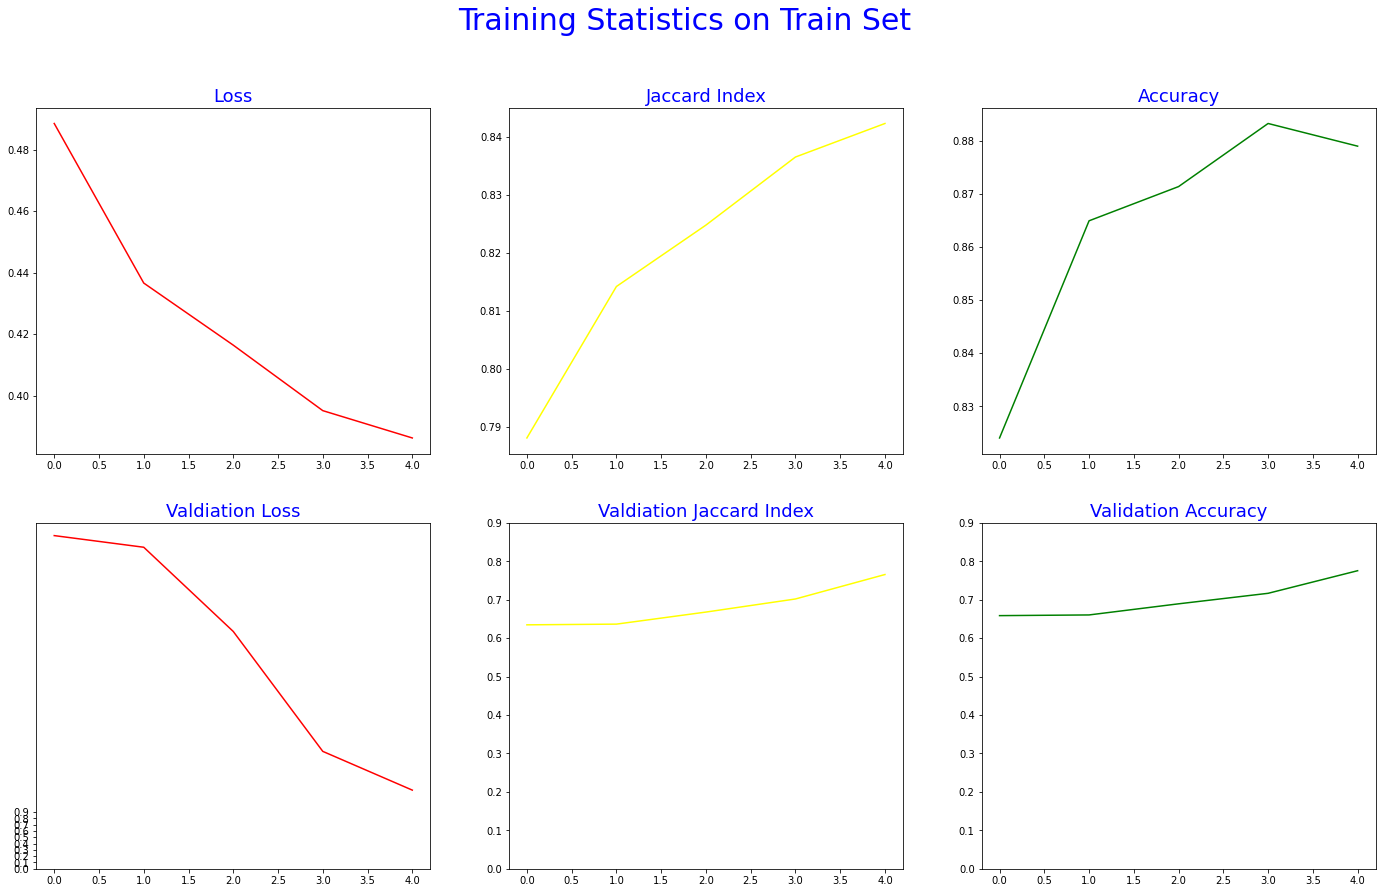

In [564]:
plt.figure(figsize=(24, 14))

plt.suptitle('Training Statistics on Train Set', fontsize = 30, color='blue')

plt.subplot(2,3,1)
plt.plot(hist.history['loss'], 'red')
plt.title('Loss',fontsize = 18, color='blue')
plt.subplot(2,3,2)
plt.plot(hist.history['iou'], 'yellow')
plt.title('Jaccard Index',fontsize = 18, color='blue')
plt.subplot(2,3,3)
plt.plot(hist.history['accuracy'], 'green')
plt.title('Accuracy',fontsize = 18, color='blue')

plt.subplot(2,3,4)
plt.plot(hist.history['val_loss'], 'red')
plt.yticks(list(np.arange(0.0, 1.0, 0.10)))
plt.title('Valdiation Loss',fontsize = 18, color='blue')
plt.subplot(2,3,5)
plt.plot(hist.history['val_iou'], 'yellow')
plt.yticks(list(np.arange(0.0, 1.0, 0.10)))
plt.title('Valdiation Jaccard Index',fontsize = 18, color='blue')
plt.subplot(2,3,6)
plt.plot(hist.history['val_accuracy'], 'green')
plt.yticks(list(np.arange(0.0, 1.0, 0.10)))
plt.title('Validation Accuracy',fontsize = 18, color='blue')
plt.show()

1/1 [==============================] - 0s 216ms/step


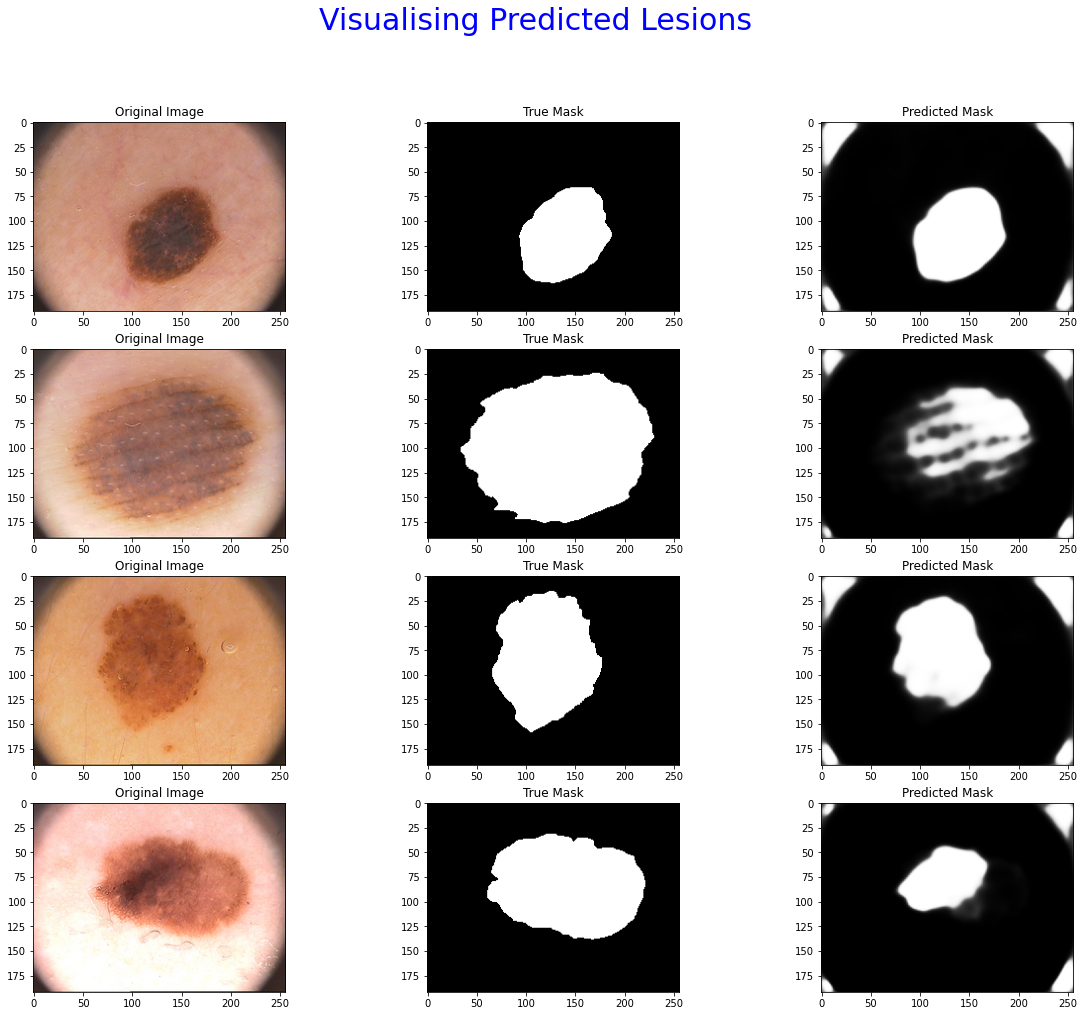

In [565]:
plt.figure(figsize=(20,16))

plt.suptitle('Visualising Predicted Lesions', fontsize = 30, color='blue')

img_pred = model_1.predict(x_test[49].reshape(1,192,256,3))
plt.subplot(4,3,1)
plt.imshow(x_test[49])
plt.title('Original Image')
plt.subplot(4,3,2)
plt.imshow(y_test[49], plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,3)
plt.imshow(img_pred.reshape(192, 256), plt.cm.binary_r)
plt.title('Predicted Mask')

img_pred = model_1.predict(x_test[36].reshape(1,192,256,3))
plt.subplot(4,3,4)
plt.imshow(x_test[36])
plt.title('Original Image')
plt.subplot(4,3,5)
plt.imshow(y_test[36], plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,6)
plt.imshow(img_pred.reshape(192, 256), plt.cm.binary_r)
plt.title('Predicted Mask')

img_pred = model_1.predict(x_test[32].reshape(1,192,256,3))
plt.subplot(4,3,7)
plt.imshow(x_test[32])
plt.title('Original Image')
plt.subplot(4,3,8)
plt.imshow(y_test[32], plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,9)
plt.imshow(img_pred.reshape(192, 256), plt.cm.binary_r)
plt.title('Predicted Mask')

img_pred = model_1.predict(x_test[21].reshape(1,192,256,3))
plt.subplot(4,3,10)
plt.imshow(x_test[21])
plt.title('Original Image')
plt.subplot(4,3,11)
plt.imshow(y_test[21], plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,12)
plt.imshow(img_pred.reshape(192, 256), plt.cm.binary_r)
plt.title('Predicted Mask')

plt.show()

In [566]:
def enhance(img):
    sub = (model_1.predict(img.reshape(1,192,256,3))).flatten()

    for i in range(len(sub)):
        if sub[i] > 0.5:
            sub[i] = 1
        else:
            sub[i] = 0
    return sub

1/1 [==============================] - 0s 215ms/step


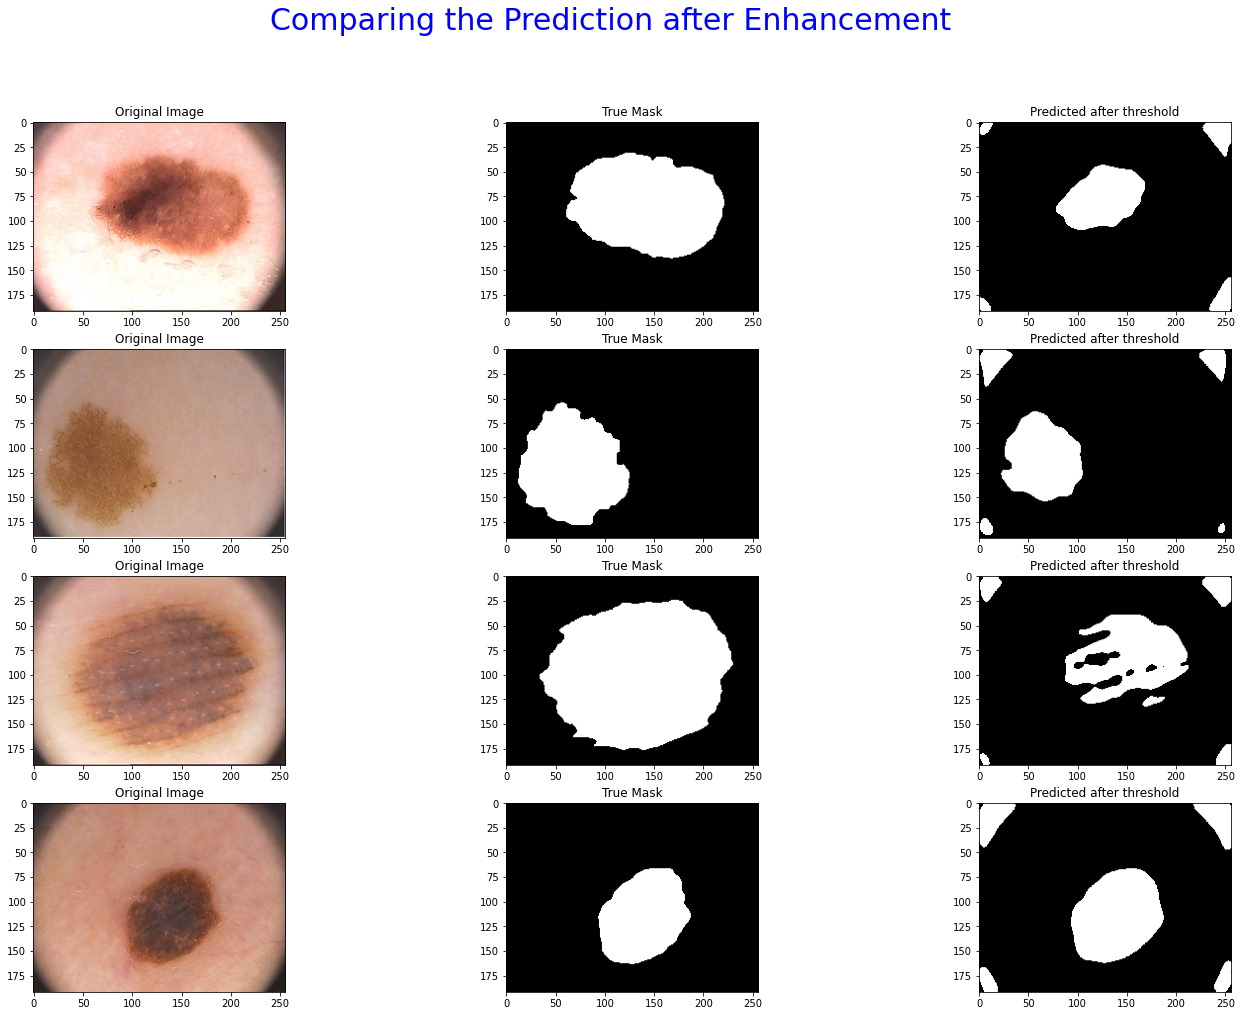

In [567]:
plt.figure(figsize=(24,16))

plt.suptitle('Comparing the Prediction after Enhancement', fontsize = 30, color='blue')

plt.subplot(4,3,1)
plt.imshow(x_test[21])
plt.title('Original Image')
plt.subplot(4,3,2)
plt.imshow(y_test[21],plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,3)
plt.imshow(enhance(x_test[21]).reshape(192,256), plt.cm.binary_r)
plt.title('Predicted after threshold')

plt.subplot(4,3,4)
plt.imshow(x_test[19])
plt.title('Original Image')
plt.subplot(4,3,5)
plt.imshow(y_test[19],plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,6)
plt.imshow(enhance(x_test[19]).reshape(192,256), plt.cm.binary_r)
plt.title('Predicted after threshold')

plt.subplot(4,3,7)
plt.imshow(x_test[36])
plt.title('Original Image')
plt.subplot(4,3,8)
plt.imshow(y_test[36],plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,9)
plt.imshow(enhance(x_test[36]).reshape(192,256), plt.cm.binary_r)
plt.title('Predicted after threshold')


plt.subplot(4,3,10)
plt.imshow(x_test[49])
plt.title('Original Image')
plt.subplot(4,3,11)
plt.imshow(y_test[49],plt.cm.binary_r)
plt.title('True Mask')
plt.subplot(4,3,12)
plt.imshow(enhance(x_test[49]).reshape(192,256), plt.cm.binary_r)
plt.title('Predicted after threshold')

plt.show()